# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd

## Load Data

In [2]:
## Load the data into a DataFrame
iowa_data = pd.read_csv("../data/Iowa_Liquor_sales_sample_10pct.csv")

# rename columns per standard naming convention
iowa_data.columns = ["Date","StoreNumber","City","ZipCode","CountyNumber","County","Category","CategoryName","VendorNumber",
                    "ItemNumber", "ItemDesc", "BottleVolume_ml","StateBottleCost","StateBottleRetail","BottlesSold",
                    "SalesDollars","VolumeSold_Liters","VolumeSold_Gallons"]
iowa_data.head(5)

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDesc,BottleVolume_ml,StateBottleCost,StateBottleRetail,BottlesSold,SalesDollars,VolumeSold_Liters,VolumeSold_Gallons
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


## Data cleaning and Data Munging

* Remove $ from StateBottleCost, StateBottleRetail, SalesDollars
* Convert Dates in proper format
* Drop null values
* Conver CountyNumber, Catagory to Integer
* Create New computation columns and category columns
* Clean Zip Code values
* Create super category to simiplied category

In [3]:
cols = ["StateBottleCost", "StateBottleRetail", "SalesDollars"]
for col in cols:
    iowa_data[col] = iowa_data[col].apply(lambda x: float(x[1:]))
    
iowa_data["Date"]=pd.to_datetime(iowa_data["Date"],format="%m/%d/%Y")

iowa_data=iowa_data.dropna()

iowa_data["CountyNumber"] = iowa_data["CountyNumber"].astype(int)
iowa_data["Category"] = iowa_data["Category"].astype(int)

iowa_data["Year"] = iowa_data["Date"].dt.year
iowa_data["Quarter"]="Q" + iowa_data["Date"].dt.quarter.map(str)

iowa_data["ZipCode"] = iowa_data["ZipCode"].str.replace('-','') 

def make_super_category(x):
   x = x.lower()
   if 'liqueur' in x:
       return 'liqueur'
   elif 'whisk' in x or 'scotch' in x:
       return 'whiskey'
   elif 'vodka' in x:
       return 'vodka'
   elif 'gin' in x:
       return 'gin'
   elif 'tequila' in x:
       return 'tequila'
   elif 'schnapps' in x:
       return 'schnapps'
   elif 'rum' in x:
       return 'rum'
   elif 'brandies' in x:
       return 'brandy'
   elif 'creme' in x:
       return 'creme'
   elif 'beer' in x:
       return 'beer'
   elif 'amaretto' in x:
       return 'amaretto'
   elif 'anisette' in x:
       return 'anisette'
   else:
       return 'misc'
   
iowa_data["Super_Category"] = iowa_data["CategoryName"].map(make_super_category)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Highest Sales Revenue in 15 Zip Codes 

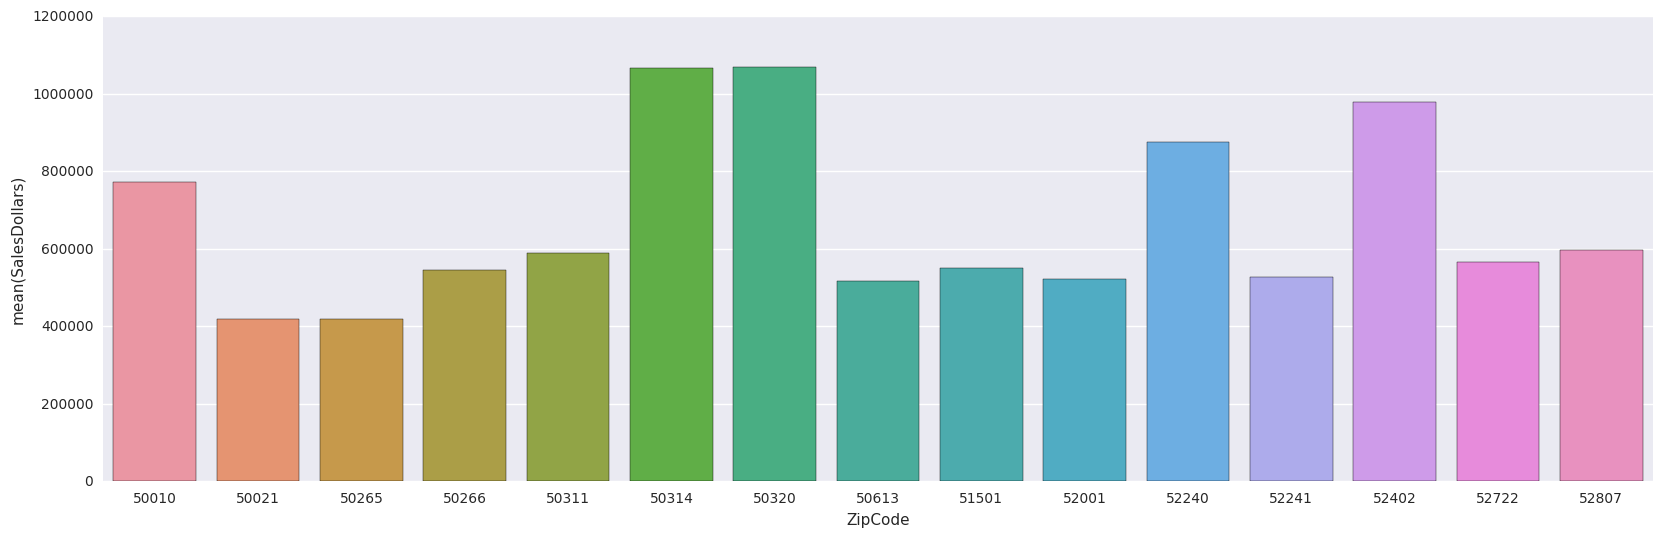

In [5]:
sale_by_zip_code = iowa_data[iowa_data["Year"]==2015].\
                groupby(["ZipCode"],as_index=False).\
                agg({"SalesDollars":"sum"}).\
                sort_values("SalesDollars",ascending=False).\
                head(15)
fig = plt.figure(figsize=(20,6))
bar_plot1 = sns.barplot(x="ZipCode",y="SalesDollars",data=sale_by_zip_code,label="Zip Code")
#bar_plot1 = sns.barplot(x="StoreNumber",y="SalesDollars",data=sale_by_zip_code, label="Store Number",color='b')


#### below is a table for the above chart with the alcohol category

In [6]:
sale_by_zip_Cat = iowa_data[(iowa_data["ZipCode"].isin(sale_by_zip_code["ZipCode"])) & (iowa_data["Year"] == 2015)].\
                groupby(["City","ZipCode","Super_Category"]).\
                agg({"SalesDollars":"sum"})
sale_by_zip_Cat

SalesDollars
City            ZipCode Super_Category              
AMES            50010   amaretto             3450.15
                        anisette               14.26
                        brandy              15009.28
                        creme                 455.09
                        gin                 56524.67
                        liqueur             75820.01
                        misc                26456.95
                        rum                 96006.90
                        schnapps            12141.83
                        tequila             33564.57
                        vodka              182386.17
                        whiskey            270214.37
ANKENY          50021   amaretto             1302.48
                        brandy               8526.14
                        creme                 221.03
                        gin                 32390.39
                        liqueur             41817.83
                        misc                19181.48
                        rum                 37216.35
                        schnapps            16032.51
                        tequila             13817.14
                        vodka               95845.28
                        whiskey            151444.20
BETTENDORF      52722   amaretto             2254.23
                        brandy              10790.01
                        creme                 526.86
                        gin                 39467.97
                        liqueur             83557.74
                        misc                12376.52
                        rum                 48447.36
...                                              ...
WEST DES MOINES 50265   liqueur             46308.64
                        misc                13865.78
                        rum                 35012.13
                        schnapps             8795.94
                        tequila             18291.04
                        vodka              132135.07
                        whiskey            122838.11
                50266   amaretto             6405.91
                        anisette               94.56
                        brandy               5468.53
                        creme                 627.44
                        gin                 43515.67
                        liqueur             51892.42
                        misc                14133.25
                        rum                 38527.72
                        schnapps             2620.52
                        tequila             18039.35
                        vodka              117787.88
                        whiskey            243392.71
WINDSOR HEIGHTS 50311   amaretto             1201.66
                        brandy               8571.15
                        creme                  28.52
                        gin                 40546.58
                        liqueur             53192.19
                        misc                23672.72
                        rum                 45267.08
                        schnapps             9031.83
                        tequila             29544.51
                        vodka              109544.60
                        whiskey            159859.23

[196 rows x 1 columns]

#### Average litter of alcohol sold  by those zip codes

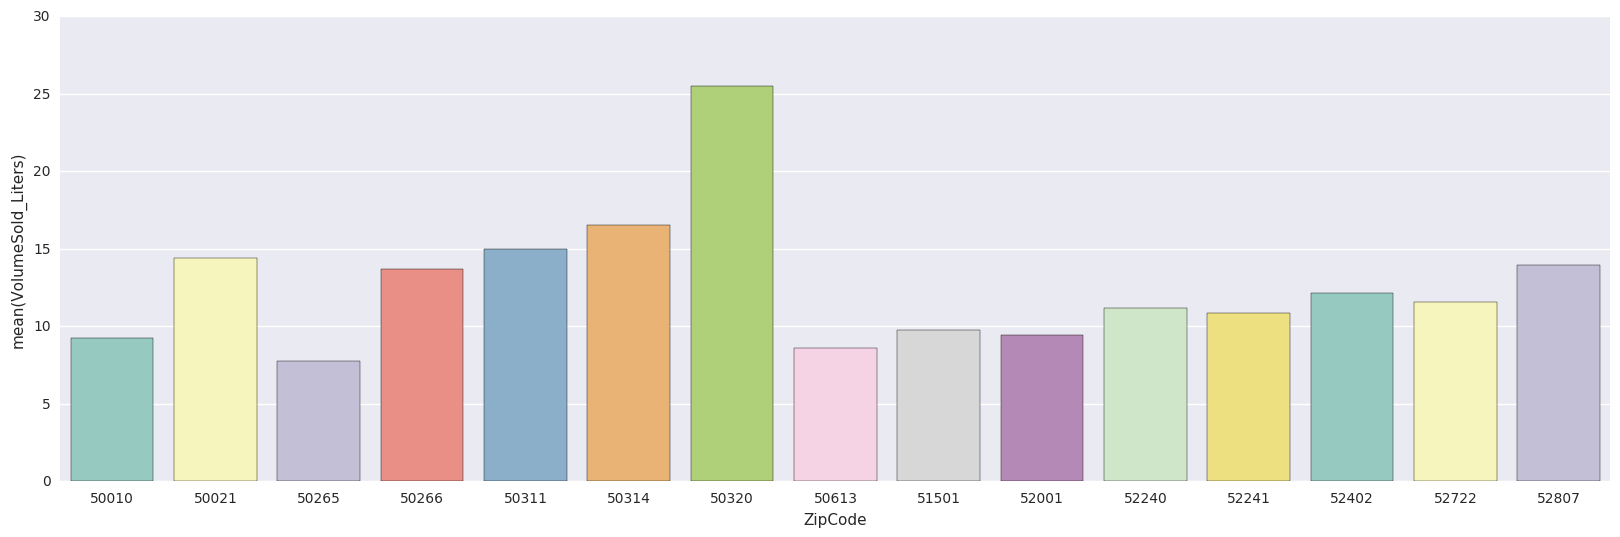

In [7]:
Avg_litter_sold = iowa_data[(iowa_data["ZipCode"].isin(sale_by_zip_code["ZipCode"])) & (iowa_data["Year"] == 2015)].\
                    groupby(["ZipCode"],as_index=False)\
                    .agg({"VolumeSold_Liters":"mean"})\
                    .sort_values("VolumeSold_Liters",ascending=False).\
                    head(15)
fig = plt.figure(figsize=(20,6))
box_plot1 = sns.barplot(y="VolumeSold_Liters",x="ZipCode",data=Avg_litter_sold,palette="Set3")

#### Hightest sales revenue by alcohol type (super category) for each zip code

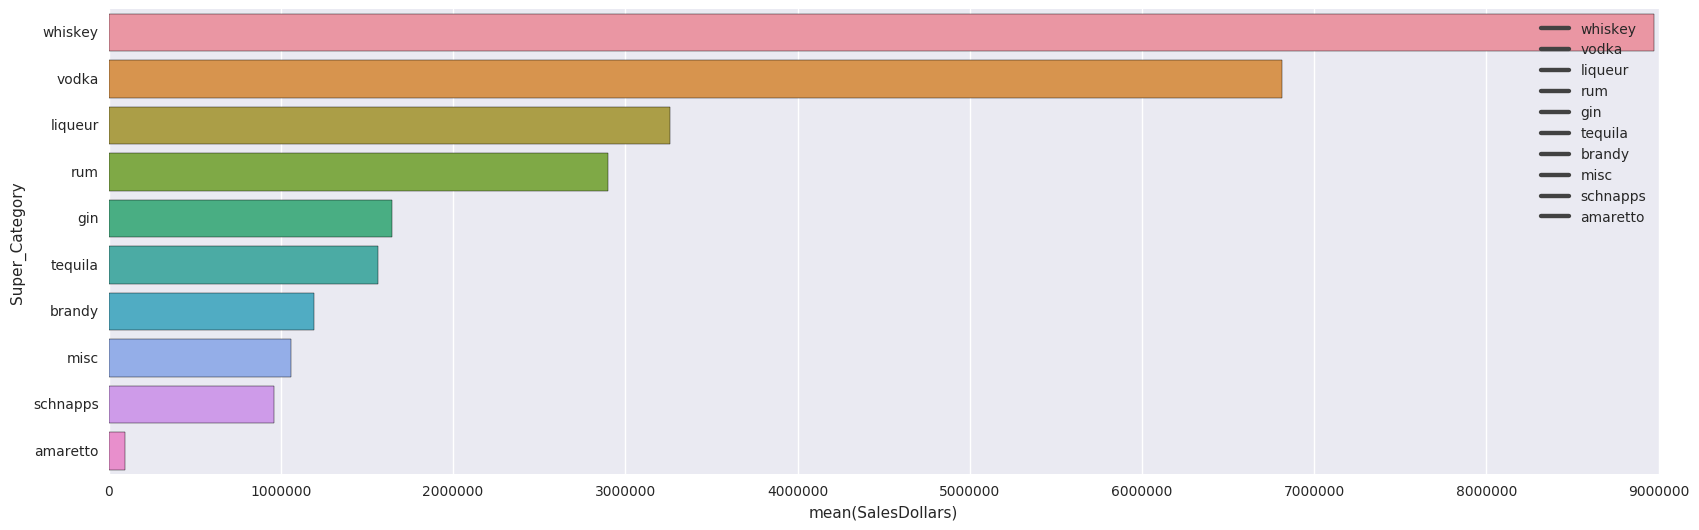

In [8]:
sale_by_cat = iowa_data[iowa_data["Year"]==2015].\
                    groupby(["Super_Category"],as_index=False)\
                    .agg({"SalesDollars":"sum"})\
                    .sort_values("SalesDollars",ascending=False).\
                    head(10)
fig = plt.figure(figsize=(20,6))
bar_plot1 = sns.barplot(y="Super_Category",x="SalesDollars",data=sale_by_cat)
bar_plot1.legend(sale_by_cat["Super_Category"])

### Total Sales by Store (first 15)

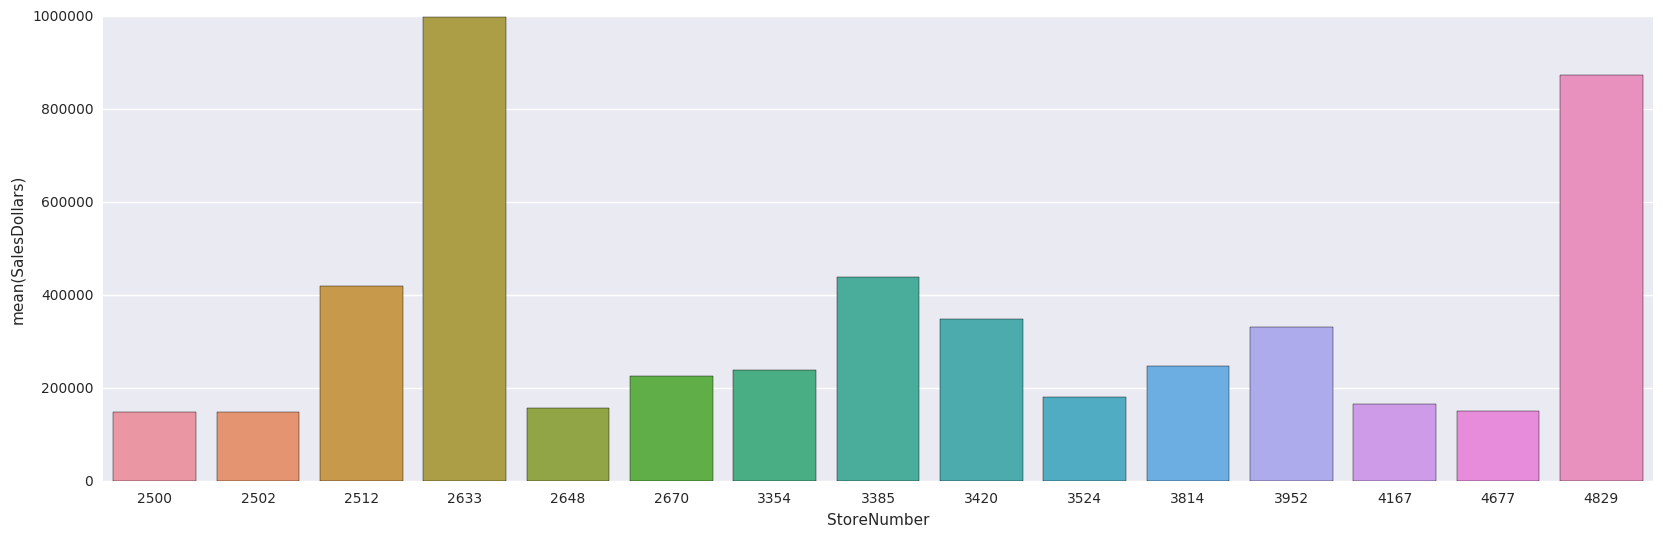

In [9]:
sale_by_store = iowa_data[(iowa_data["ZipCode"].isin(sale_by_zip_code["ZipCode"])) & (iowa_data["Year"] == 2015)].\
                    groupby(["StoreNumber"],as_index=False)\
                    .agg({"SalesDollars":"sum"})\
                    .sort_values("SalesDollars",ascending=False).\
                    head(15)
fig = plt.figure(figsize=(20,6))
bar_plot1 = sns.barplot(y="SalesDollars",x="StoreNumber",data=sale_by_store)

In [12]:
sale_by_store

,StoreNumber,SalesDollars
28,2633,997924.42
170,4829,874664.18
41,3385,439584.35
7,2512,419534.61
42,3420,348837.36
73,3952,331874.38
62,3814,247417.42
40,3354,240153.72
33,2670,227060.96
45,3524,180805.62


## Record your findings

Zip Codes 50320, 50314 have highest sales among all zip codes.

Zip Code 50320 has highest average litter sold among top performing.

Alcohol type Whiskey has a highest sales among all types of alcohol.

Store Number 2633 and 4829 has highest sales among top performing zip Codes.

# Mine the data


#### Create derived and calcualted columns 

In [10]:
iowa_data["PricePerLiter"] = iowa_data["SalesDollars"] / iowa_data["VolumeSold_Liters"]
iowa_data["Margin"] = (iowa_data["StateBottleRetail"] - iowa_data["StateBottleCost"]) * iowa_data["BottlesSold"]

#### Filter the Data

Some stores may have opened or closed in 2015. These data points will heavily skew models, so we need to filter them out or find a way to deal with them.

In [11]:
# Determine which stores were open all of 2015
dates = iowa_data.groupby(by=["StoreNumber"], as_index=False)

# Find the first and last sales date.
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out stores that opened or closed throughout the year
lower_cutoff = pd.Timestamp('20150301')
upper_cutoff = pd.Timestamp('20151001')

mask = (dates['Date amin'] < lower_cutoff) & (dates['Date amax'] > upper_cutoff)

good_stores = dates[mask]["StoreNumber"]

#### Overwrite iowa_data set with good stores

In [12]:
iowa_data=iowa_data[iowa_data["StoreNumber"].isin(good_stores)]
iowa_data.shape

(256181, 23)

In [74]:
#create a aggregated data frame for each store 
iowa_data_2015 =  iowa_data[iowa_data["Year"]==2015].groupby(["Year","Quarter","StoreNumber","Super_Category"],as_index=False)

# aggregate

iowa_data_2015 = iowa_data_2015.agg(
    {
   "ZipCode": lambda x: x.iloc[0], # doing this eliminates needs to group by on zip code
   "City": lambda x: x.iloc[0], #doing this eliminates needs to group by City
   "CountyNumber": lambda x: x.iloc[0], #doing this eliminates needs to group by County
    'BottlesSold': [np.sum],
    'SalesDollars':[np.sum, np.mean],
    'StateBottleCost': [np.sum],
    'PricePerLiter': [np.mean],
    'Margin': [np.mean, np.max],
    "VolumeSold_Liters": [np.sum, np.mean]})
# Rename Column names
#store_sale_df.columns = [' '.join(col).strip() for col in store_sale_df.columns.values]
iowa_data_2015.columns=["Year","Quarter","StoreNumber","Super_Category","City","BottleSold_Sum","Margin_Mean","Margin_Max",
                      "SalesDollars_sum", "SalesDollars_Mean","CountyNumber","StateBottleCost_Sum",
                      "PricePerLiter_Mean","ZipCode", "VolumeSold_Liters_Sum","VolumeSold_Liters_Mean"]
iowa_data_2015

,Year,Quarter,StoreNumber,Super_Category,City,BottleSold_Sum,Margin_Mean,Margin_Max,SalesDollars_sum,SalesDollars_Mean,CountyNumber,StateBottleCost_Sum,PricePerLiter_Mean,ZipCode,VolumeSold_Liters_Sum,VolumeSold_Liters_Mean
0,2015,Q1,2106,amaretto,CEDAR FALLS,36,24.360000,24.36,218.88,72.960000,7,12.15,6.080000,50613,36.00,12.000000
1,2015,Q1,2106,brandy,CEDAR FALLS,72,120.960000,199.20,725.04,362.520000,7,13.74,11.968333,50613,57.00,28.500000
2,2015,Q1,2106,gin,CEDAR FALLS,247,50.866000,171.00,2279.19,151.946000,7,96.76,10.572444,50613,245.00,16.333333
3,2015,Q1,2106,liqueur,CEDAR FALLS,474,188.763750,559.44,9059.46,566.216250,7,183.40,19.335625,50613,439.50,27.468750
4,2015,Q1,2106,misc,CEDAR FALLS,80,30.688000,52.32,448.20,89.640000,7,27.73,10.214000,50613,78.00,15.600000
5,2015,Q1,2106,rum,CEDAR FALLS,462,216.354545,846.72,7135.50,648.681818,7,99.32,14.720606,50613,450.00,40.909091
6,2015,Q1,2106,schnapps,CEDAR FALLS,204,65.888000,189.12,2964.00,197.600000,7,137.89,15.263778,50613,186.00,12.400000
7,2015,Q1,2106,tequila,CEDAR FALLS,84,204.000000,300.00,1836.00,612.000000,7,52.00,30.500000,50613,81.00,27.000000
8,2015,Q1,2106,vodka,CEDAR FALLS,568,66.363333,286.56,5965.52,198.850667,7,252.11,15.003302,50613,537.25,17.908333
9,2015,Q1,2106,whiskey,CEDAR FALLS,478,99.503448,405.00,8655.50,298.465517,7,420.26,27.880230,50613,416.35,14.356897


Convert Zip Codes to category type

In [60]:
iowa_data_2015["ZipCode"] = iowa_data_2015["ZipCode"].astype('category')

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [35]:
iowa_data_2015_corr = iowa_data_2015.corr()
iowa_data_2015_corr

,Year,StoreNumber,BottleSold_Sum,Margin_Mean,Margin_Max,SalesDollars_sum,SalesDollars_Mean,CountyNumber,StateBottleCost_Sum,PricePerLiter_Mean,VolumeSold_Liters_Sum,VolumeSold_Liters_Mean
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StoreNumber,NaN,1.000000,-0.202455,-0.008632,-0.133482,-0.198314,-0.008558,0.004331,-0.323659,0.057064,-0.217860,-0.033163
BottleSold_Sum,NaN,-0.202455,1.000000,0.361447,0.707249,0.932362,0.360628,0.037263,0.680940,0.040957,0.956632,0.351376
Margin_Mean,NaN,-0.008632,0.361447,1.000000,0.652432,0.426741,0.999930,0.014407,0.098808,0.110082,0.411106,0.872372
Margin_Max,NaN,-0.133482,0.707249,0.652432,1.000000,0.792292,0.650539,0.020948,0.394437,0.073678,0.770757,0.573905
SalesDollars_sum,NaN,-0.198314,0.932362,0.426741,0.792292,1.000000,0.426060,0.035545,0.704231,0.088888,0.938933,0.355047
SalesDollars_Mean,NaN,-0.008558,0.360628,0.999930,0.650539,0.426060,1.000000,0.014510,0.098661,0.110776,0.409531,0.870708
CountyNumber,NaN,0.004331,0.037263,0.014407,0.020948,0.035545,0.014510,1.000000,0.029951,0.048281,0.028594,0.003223
StateBottleCost_Sum,NaN,-0.323659,0.680940,0.098808,0.394437,0.704231,0.098661,0.029951,1.000000,0.171062,0.649526,0.056434
PricePerLiter_Mean,NaN,0.057064,0.040957,0.110082,0.073678,0.088888,0.110776,0.048281,0.171062,1.000000,0.009845,-0.103494


In [75]:
iowa_target_2015=iowa_data_2015["SalesDollars_sum"]

In [76]:
del iowa_data_2015["SalesDollars_sum"]
del iowa_data_2015["SalesDollars_Mean"]
del iowa_data_2015["Year"]
del iowa_data_2015["Quarter"]
del iowa_data_2015["StoreNumber"]
del iowa_data_2015["City"]
#del iowa_data_2015["Super_Category"]
del iowa_data_2015["CountyNumber"]
del iowa_data_2015["Margin_Mean"]
del iowa_data_2015["Margin_Max"]
del iowa_data_2015["VolumeSold_Liters_Sum"]
del iowa_data_2015["VolumeSold_Liters_Mean"]
del iowa_data_2015["BottleSold_Sum"]

In [78]:
iowa_data_2015 = pd.get_dummies(iowa_data_2015)

In [79]:
iowa_data_2015.head()

,StateBottleCost_Sum,PricePerLiter_Mean,Super_Category_amaretto,Super_Category_anisette,Super_Category_beer,Super_Category_brandy,Super_Category_creme,Super_Category_gin,Super_Category_liqueur,Super_Category_misc,...,ZipCode_52776,ZipCode_52777,ZipCode_52778,ZipCode_52802,ZipCode_52803,ZipCode_52804,ZipCode_52806,ZipCode_52807,ZipCode_56201,ZipCode_7122
0,12.15,6.080000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.74,11.968333,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96.76,10.572444,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,183.40,19.335625,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,27.73,10.214000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [107]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.preprocessing import StandardScaler

In [115]:
def standard_regression(X, y,model, random_state = 42):
    X_train,     \
        X_test,  \
        y_train, \
        y_test = train_test_split(X, y,random_state=random_state)

    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    scaler = StandardScaler()

    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    

    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    sns.regplot(y_test,model.predict(X_test) )
    
     
    return {'model': model,
            'train_score' : train_score,
            'test_score' : test_score }

In [116]:
models={}

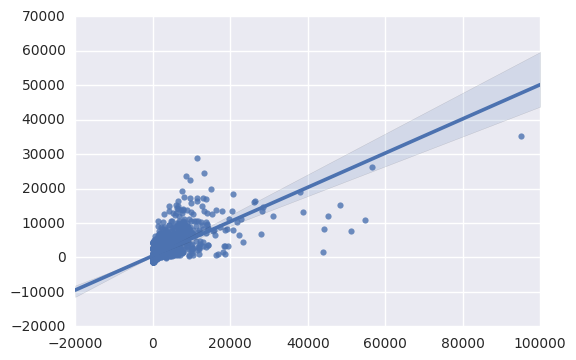

In [117]:
# run a ridge regression
models[0] = standard_regression(iowa_data_2015,iowa_target_2015,Ridge())

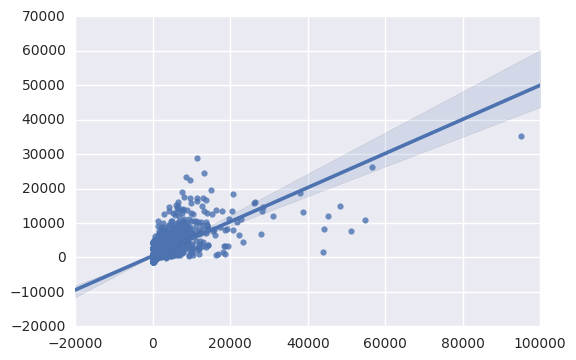

In [118]:
# run Lasso regression with alpha 2
models[1]  = standard_regression(iowa_data_2015,iowa_target_2015,Lasso(alpha=2))

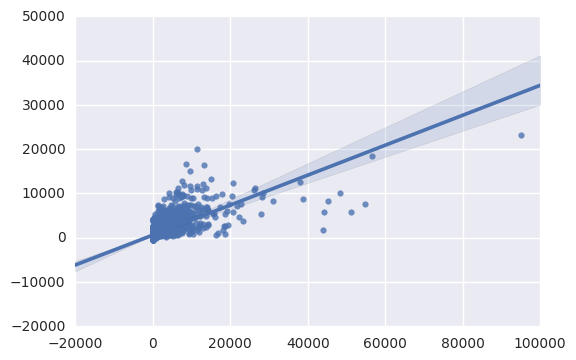

In [119]:
# run elasticnet
models[2]  = standard_regression(iowa_data_2015,iowa_target_2015,ElasticNet())

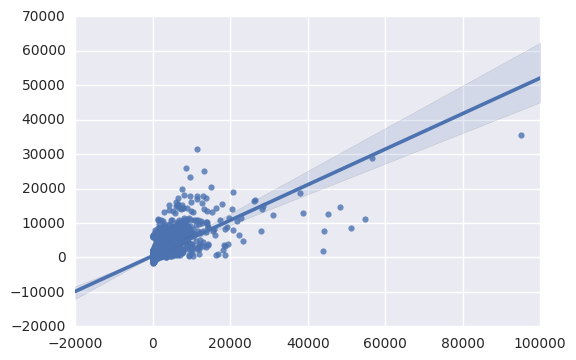

In [120]:
# run SGDregressor and iterate over 350 times
models[3] = standard_regression(iowa_data_2015,iowa_target_2015,SGDRegressor(n_iter=350))

In [121]:
pd.DataFrame(models)

,0,1,2,3
model,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=2, copy_X=True, fit_intercept=True...","ElasticNet(alpha=1.0, copy_X=True, fit_interce...","SGDRegressor(alpha=0.0001, average=False, epsi..."
test_score,0.50723,0.50707,0.445043,0.49523
train_score,0.534096,0.533878,0.475106,0.528368


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

### Please see the results and plot above.

Keeping covarianced features gave higher score however I am going with features that are not highly covarianced or related. therefore removing following features:

SalesDollars_Mean

Year

Quarter

StoreNumber

City

CountyNumber

Margin_Mean

Margin_Max

VolumeSold_Liters_Sum

VolumeSold_Liters_Mean

BottleSold_Sum

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

All the facts are known in this problem and with the data given, it appears all models have good score. This is due to all features are directly related to target and there is a higer correlation. This appears to be an algebra problem compare to machine learning.